In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_file_path = 'churn-bigml-80.csv'
test_file_path = 'churn-bigml-20.csv'

In [4]:
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [5]:
print(train_data.head())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [6]:
print(test_data.head())

  State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95   

In [7]:
label_encoders = {}
categorical_columns = ['International plan', 'Voice mail plan', 'Churn']

In [8]:
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])  
    label_encoders[col] = le

In [9]:
scaler = StandardScaler()
numerical_columns = [
    'Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge',
    'Total intl minutes', 'Total intl calls', 'Total intl charge',
    'Customer service calls'
]

In [10]:
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

In [11]:
columns_to_drop = ['State', 'Area code']
train_data = train_data.drop(columns=columns_to_drop, axis=1)
test_data = test_data.drop(columns=columns_to_drop, axis=1)

In [12]:
print("Train Data Head:\n", train_data.head())

Train Data Head:
    Account length  International plan  Voice mail plan  Number vmail messages  \
0        0.692163                   0                1               1.247508   
1        0.161278                   0                1               1.320985   
2        0.919686                   0                0              -0.589414   
3       -0.420168                   1                0              -0.589414   
4       -0.647691                   1                0              -0.589414   

   Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0           1.579670         0.484868          1.579942          -0.058619   
1          -0.329918         1.135375         -0.330194          -0.095916   
2           1.179302         0.685024          1.179465          -1.554439   
3           2.212509        -1.466653          2.212675          -2.718509   
4          -0.235822         0.634985         -0.235772          -1.022461   

   Total eve calls  Total 

In [13]:
print("Test Data Head:\n", test_data.head())

Test Data Head:
    Account length  International plan  Voice mail plan  Number vmail messages  \
0        0.414080                   0                0              -0.589414   
1       -0.900493                   0                0              -0.589414   
2        1.526412                   0                0              -0.589414   
3        0.262399                   0                0              -0.589414   
4       -1.304977                   0                0              -0.589414   

   Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0           0.092590        -0.165639          0.093075           2.968355   
1          -0.929547         1.835921         -0.929282           0.551880   
2           2.830588        -1.666809          2.830213           2.304855   
3          -1.274564         0.134595         -1.274408          -1.238393   
4          -1.110358         0.835141         -1.110527           0.288835   

   Total eve calls  Total e

In [14]:
train_data.to_csv('processed_train_data.csv', index=False)
test_data.to_csv('processed_test_data.csv', index=False)

In [15]:
def plot_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'{title}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

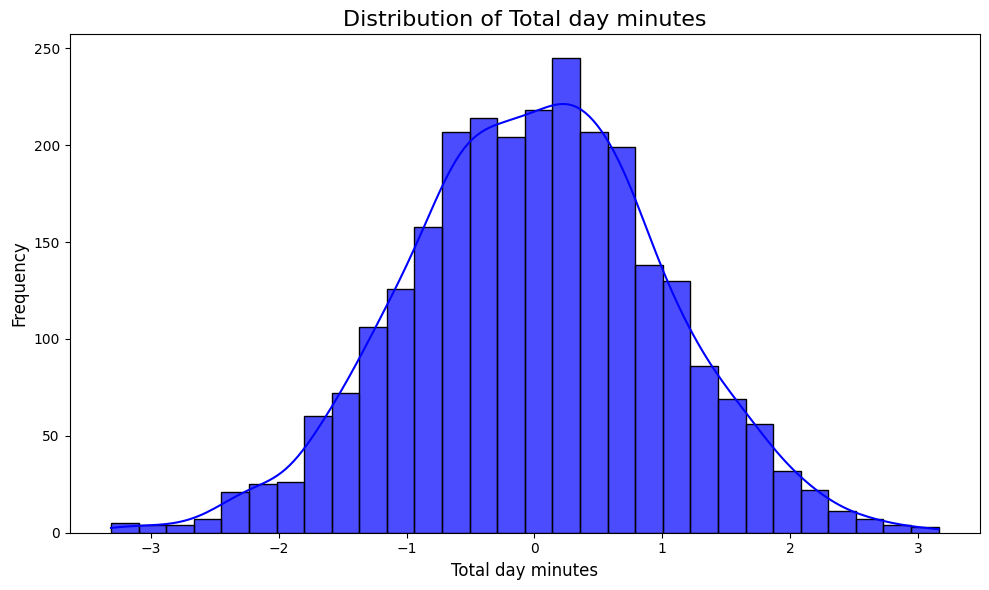

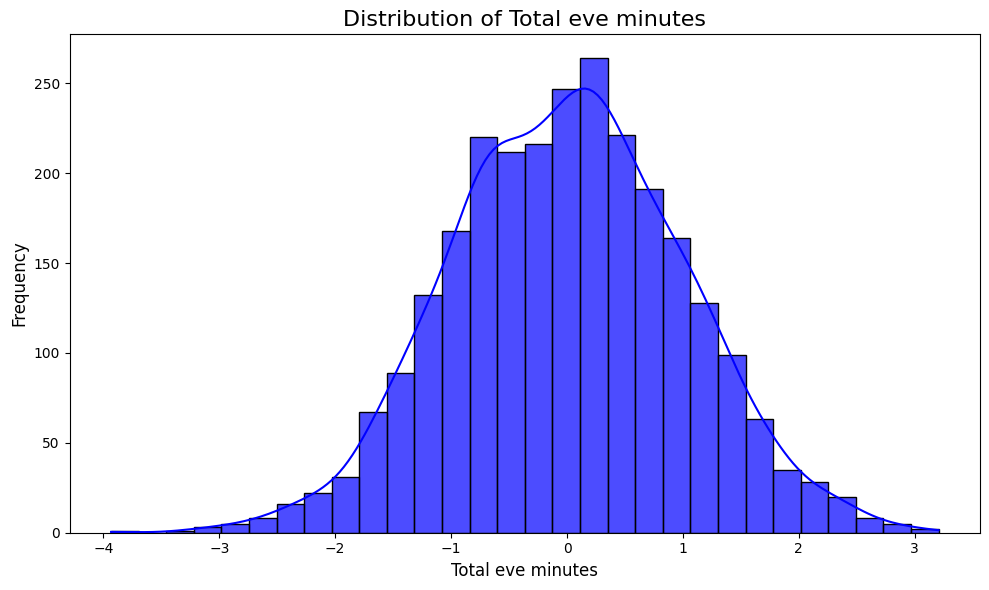

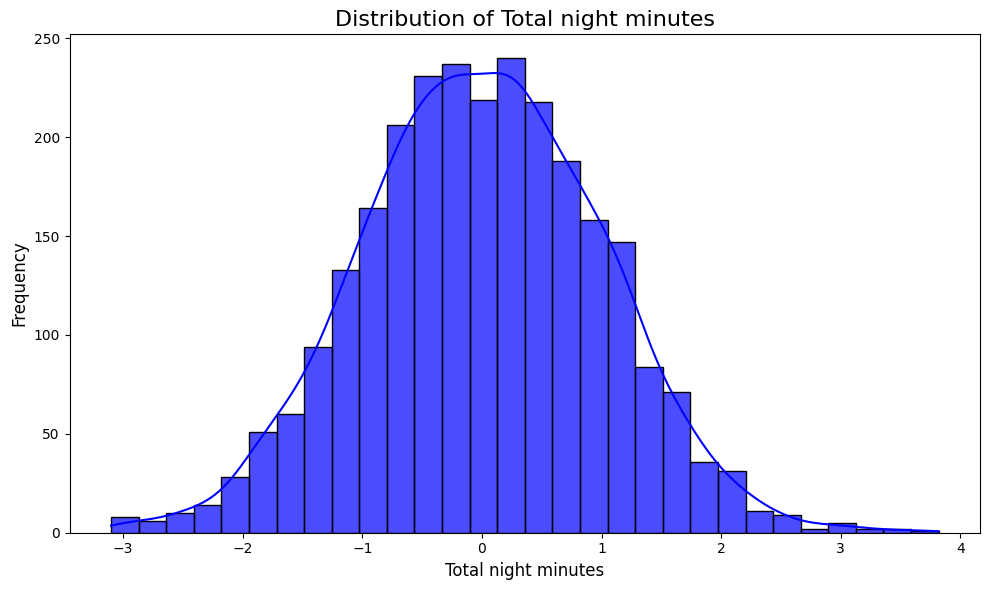

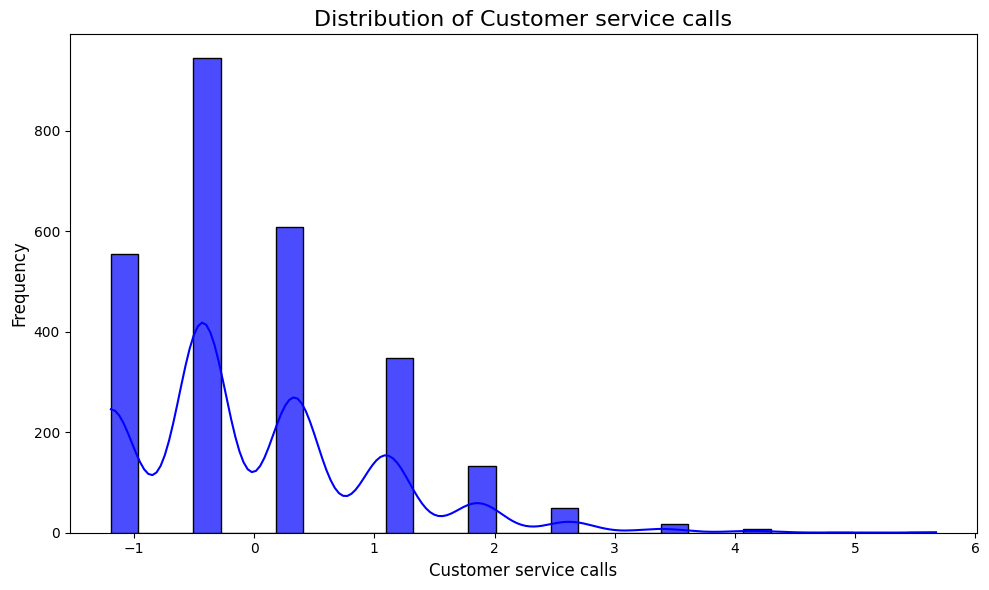

In [16]:
for column in ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Customer service calls']:
    plot_distribution(train_data, column, f'Distribution of {column}')

In [17]:
def plot_categorical_distribution(data, column, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column, palette='viridis')
    plt.title(f'{title}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()
    plt.show()

C:\Users\godsj\AppData\Local\Temp\ipykernel_2668\594056545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='viridis')


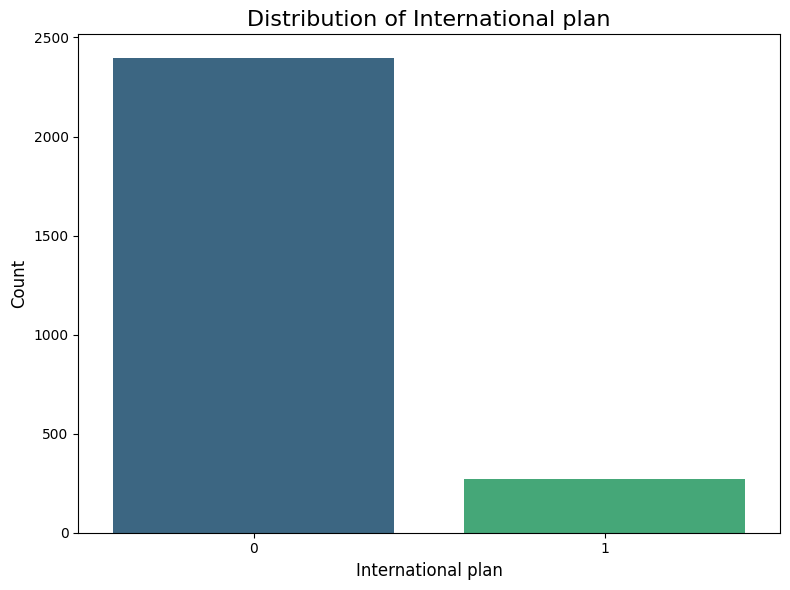

C:\Users\godsj\AppData\Local\Temp\ipykernel_2668\594056545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='viridis')


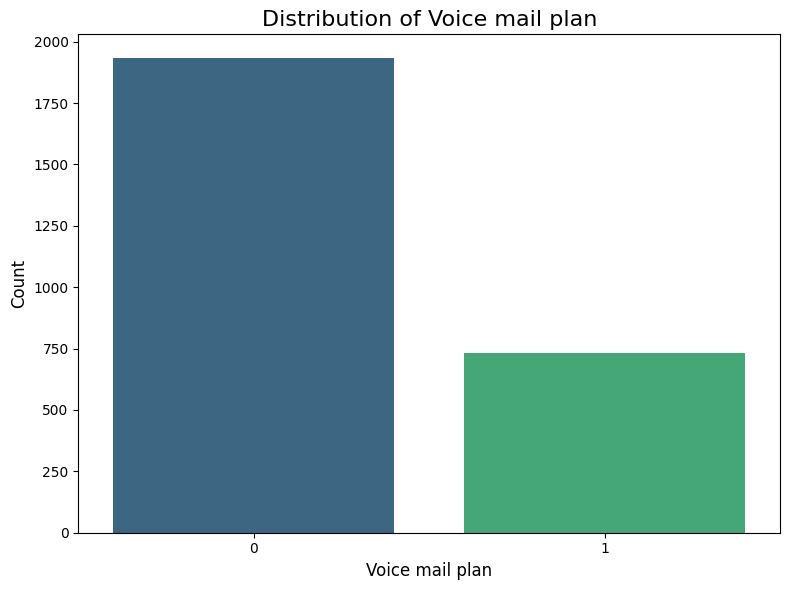

C:\Users\godsj\AppData\Local\Temp\ipykernel_2668\594056545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='viridis')


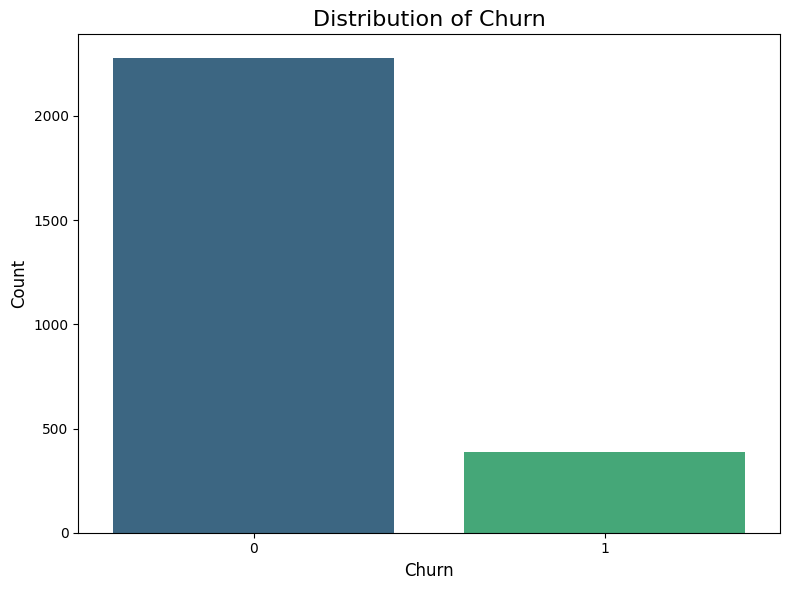

In [18]:
categorical_columns = ['International plan', 'Voice mail plan', 'Churn']
for column in categorical_columns:
    plot_categorical_distribution(train_data, column, f'Distribution of {column}')

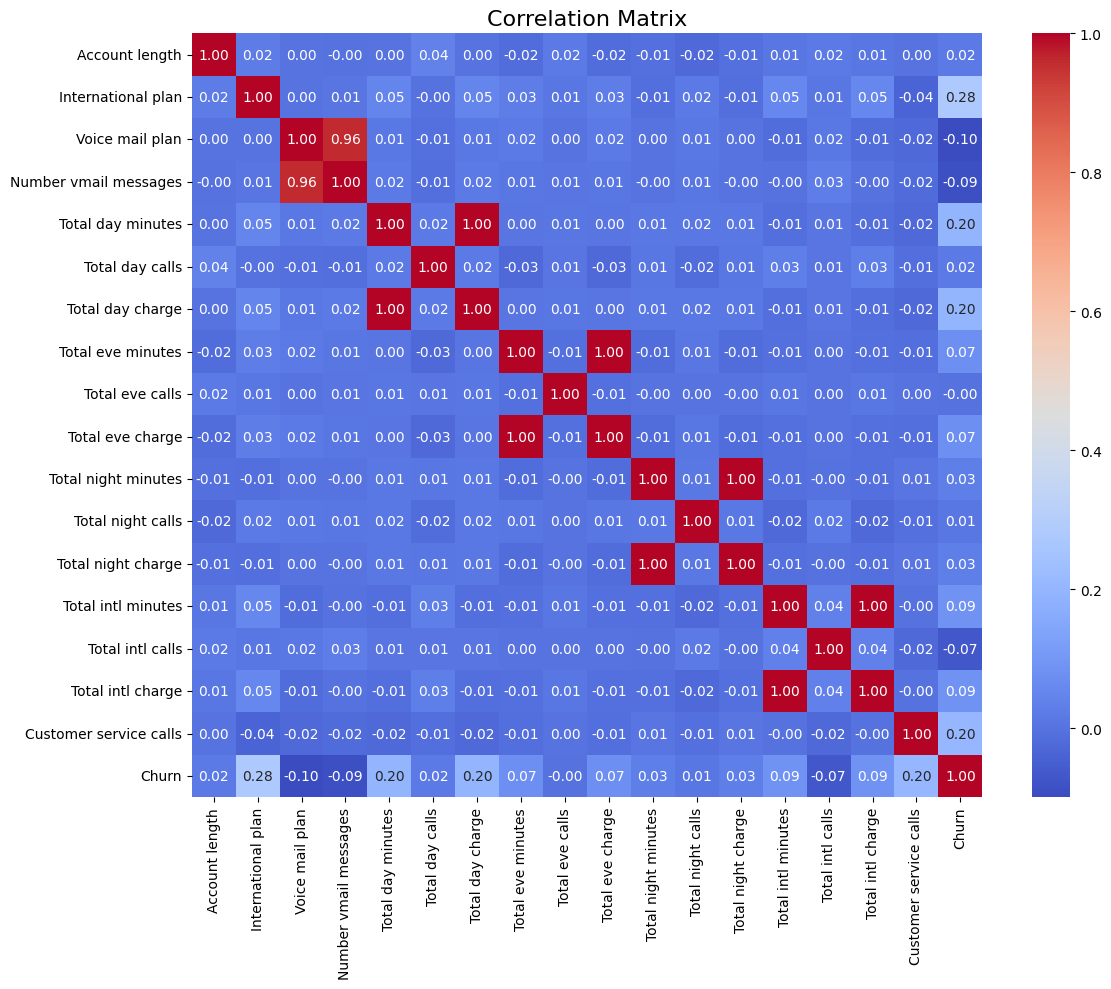

In [19]:
plt.figure(figsize=(12, 10))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
def plot_churn_relation(data, feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='Churn', y=feature, palette='coolwarm')
    plt.title(f'Churn vs {feature}', fontsize=16)
    plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.tight_layout()
    plt.show()

C:\Users\godsj\AppData\Local\Temp\ipykernel_2668\873498424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=feature, palette='coolwarm')


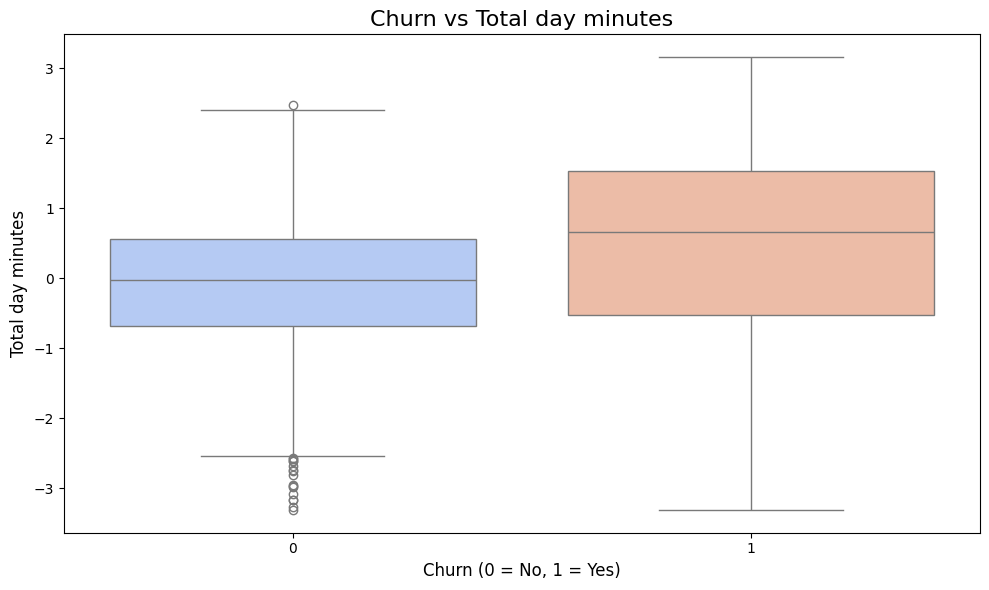

C:\Users\godsj\AppData\Local\Temp\ipykernel_2668\873498424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=feature, palette='coolwarm')


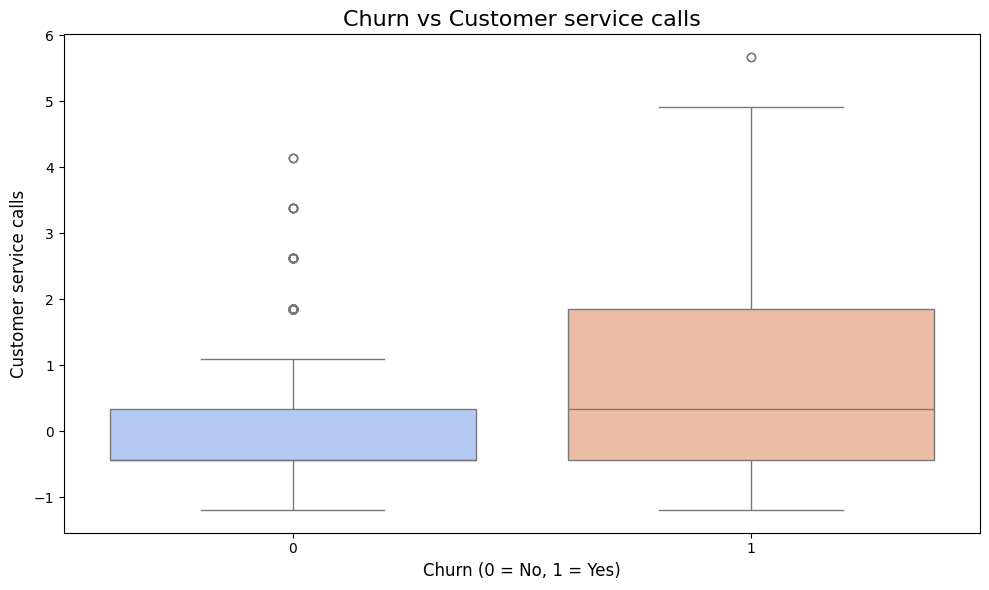

In [21]:
for feature in ['Total day minutes', 'Customer service calls']:
    plot_churn_relation(train_data, feature)

In [24]:
# Customer service calls별 Churn 비율 계산
churn_rate = train_data.groupby('Customer service calls')['Churn'].mean() * 100
print(churn_rate)

Customer service calls
-1.191955     14.234234
-0.429172     10.476190
 0.333610     10.197368
 1.096392     10.632184
 1.859175     48.120301
 2.621957     59.183673
 3.384740     58.823529
 4.147522     62.500000
 4.910305    100.000000
 5.673087    100.000000
Name: Churn, dtype: float64


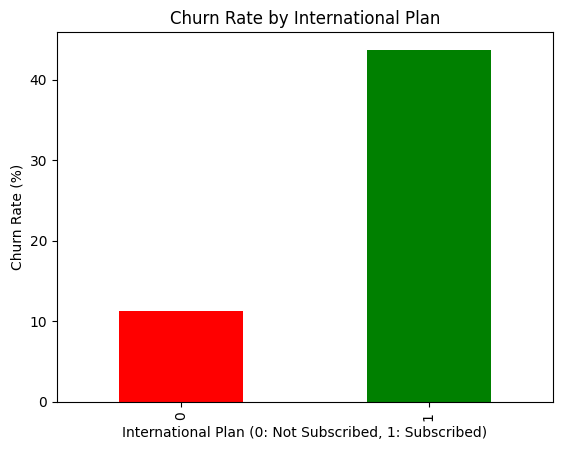

In [27]:
# International plan별 Churn 비율 계산
churn_rate_by_plan = train_data.groupby('International plan')['Churn'].mean() * 100

# 시각화
import matplotlib.pyplot as plt

churn_rate_by_plan.plot(kind='bar', color=['red', 'green'])
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan (0: Not Subscribed, 1: Subscribed)')
plt.ylabel('Churn Rate (%)')
plt.show()

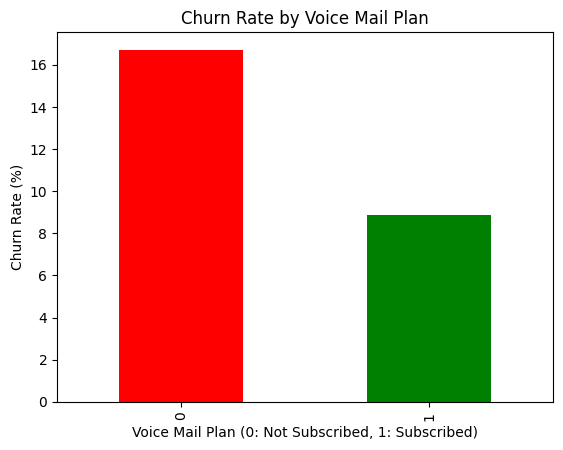

In [29]:
# Voice mail plan별 Churn 비율 계산
churn_rate_by_voicemail = train_data.groupby('Voice mail plan')['Churn'].mean() * 100

# 시각화
import matplotlib.pyplot as plt

churn_rate_by_voicemail.plot(kind='bar', color=['red', 'green'])
plt.title('Churn Rate by Voice Mail Plan')
plt.xlabel('Voice Mail Plan (0: Not Subscribed, 1: Subscribed)')
plt.ylabel('Churn Rate (%)')
plt.show()